# example: Keras 1D convolutional neural network on iris dataset

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'ticks')
sns.set_palette('husl')
import talos as ta

%matplotlib inline
plt.rcParams["figure.figsize"] = [17, 10]

Using TensorFlow backend.


# iris dataset

In [2]:
df = pd.read_csv(
    'iris.csv',
    header = None,
    names  = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


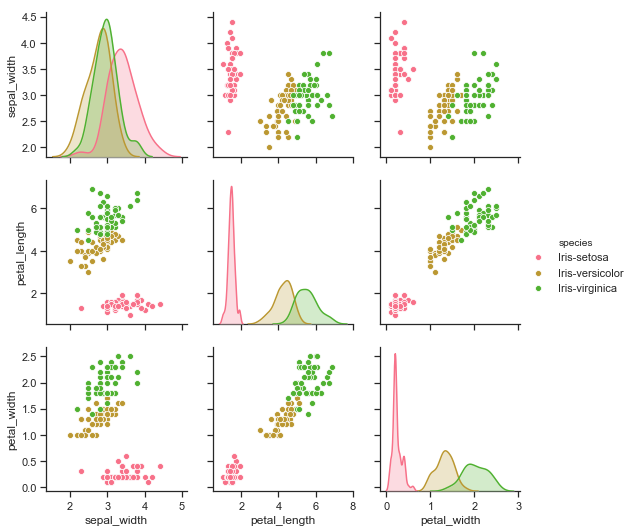

In [3]:
sns.pairplot(df.iloc[:, 1:6], hue = "species");

In [4]:
df['labels'] = df['species'].astype('category').cat.codes
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['labels']
# Convert class vectors to binary class matrices using 1 hot encoding.
# 0 ---> 1, 0, 0
# 1 ---> 0, 1, 0
# 2 ---> 0, 0, 1
num_classes = len(y.unique())
y = keras.utils.to_categorical(y, len(y.unique()))

x = np.asarray(x)
y = np.asarray(y)

x = x.reshape(len(x), 4, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, shuffle = True)

# history class

In [5]:
# Define a callback class which is to be passed to the model fitting function
# as an element of a list of possible callbacks.
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs = {}):
        self.acc = []
    def on_epoch_end(self, batch, logs = {}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

# checkpoints

In [6]:
#checkpoint = keras.callbacks.ModelCheckpoint(
#    filepath       = 'best_model.{epoch:02d}-{val_loss:.2f}.h5',
#    monitor        = 'val_loss',
#    save_best_only = True
#)

# model and training

In [7]:
model = Sequential()
model.add(Conv1D(32, (3), input_shape = (4, 1), activation  = 'relu'))
model.add(MaxPooling1D(pool_size = (2)))
model.add(Flatten())
model.add(Dropout(rate = 0.5))
model.add(Dense(100,                            activation = 'relu'))
model.add(Dense(num_classes,                    activation  = 'softmax'))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
plot_model(model, to_file = "model.png")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 3,731
Trainable params: 3,731
Non-trainable params: 0
_________________________________________________________________


In [8]:
epochs     = 500
batch_size = 128

model.fit(
    x_train,
    y_train,
    batch_size      = batch_size,
    epochs          = epochs,
    verbose         = False,
    validation_data = (x_test, y_test),
    callbacks       = [history]
)

score = model.evaluate(x_test, y_test, verbose = False)

test loss: 0.09985028266906738
test accuracy: 0.9599999904632568


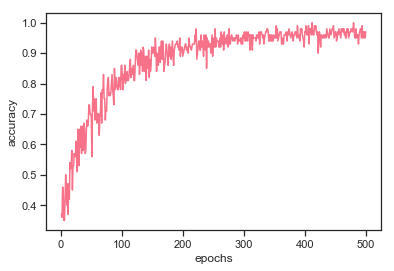

In [9]:
print('test loss:', score[0])
print('test accuracy:', score[1])
plt.plot(range(1, epochs + 1), history.acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# hyperparameter scan using Talos

- [Talos examples](https://nbviewer.jupyter.org/github/autonomio/talos/blob/master/examples/Hyperparameter%20Optimization%20with%20Keras%20for%20the%20Iris%20Prediction.ipynb#six)

  0%|          | 0/128 [00:00<?, ?it/s]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 603  

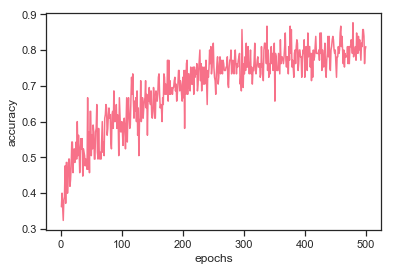

  1%|          | 1/128 [00:01<04:06,  1.94s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

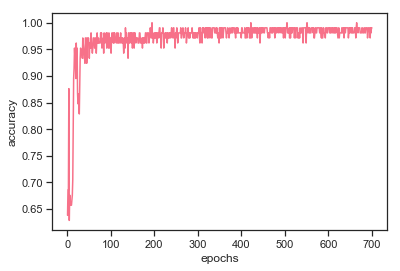

  2%|▏         | 2/128 [00:04<04:24,  2.10s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30

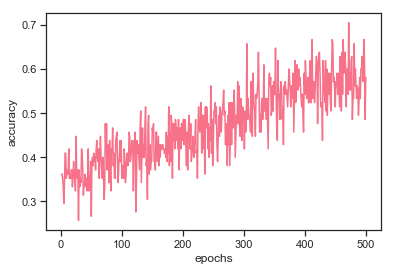

  2%|▏         | 3/128 [00:06<04:14,  2.04s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

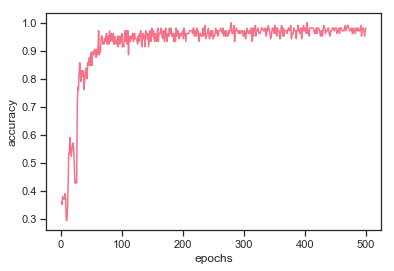

  3%|▎         | 4/128 [00:08<04:10,  2.02s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

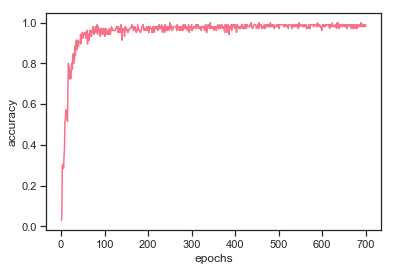

  4%|▍         | 5/128 [00:10<04:24,  2.15s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603  

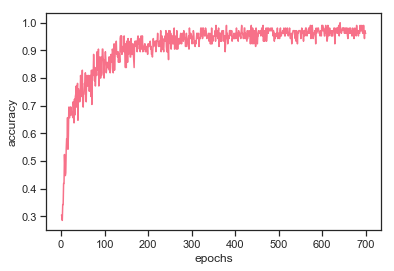

  5%|▍         | 6/128 [00:13<04:35,  2.26s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603

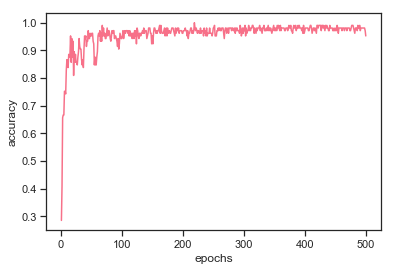

  5%|▌         | 7/128 [00:15<04:25,  2.19s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30

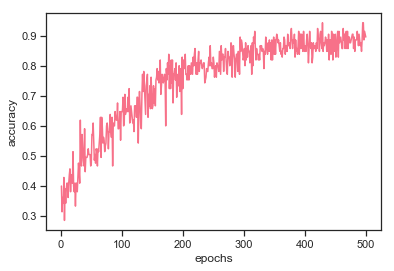

  6%|▋         | 8/128 [00:17<04:15,  2.13s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

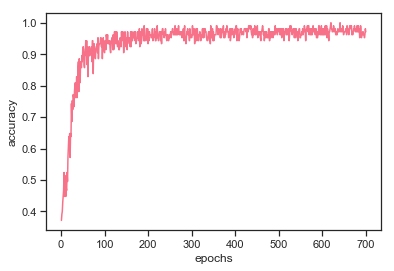

  7%|▋         | 9/128 [00:19<04:32,  2.29s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

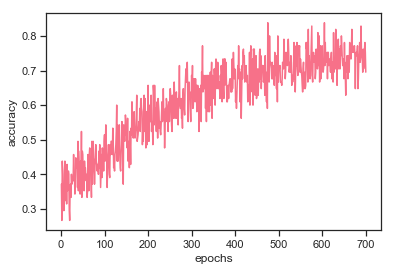

  8%|▊         | 10/128 [00:22<04:42,  2.39s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

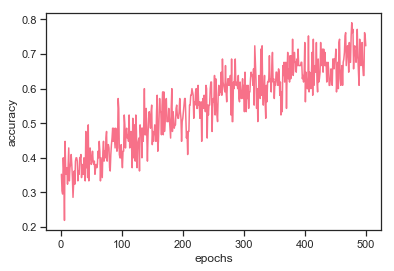

  9%|▊         | 11/128 [00:24<04:30,  2.31s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30

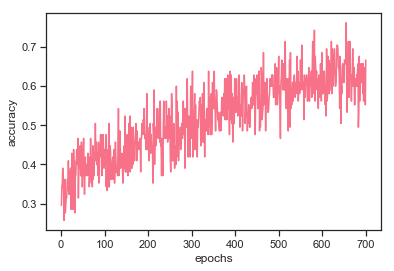

  9%|▉         | 12/128 [00:27<04:33,  2.35s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

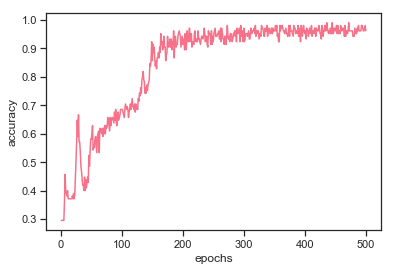

 10%|█         | 13/128 [00:29<04:17,  2.24s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303

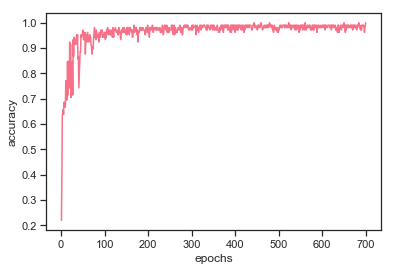

 11%|█         | 14/128 [00:31<04:28,  2.36s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303  

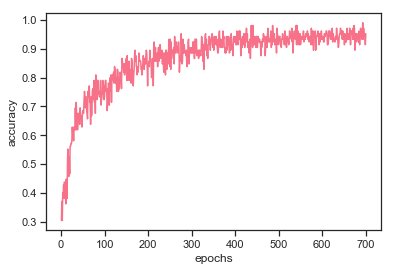

 12%|█▏        | 15/128 [00:34<04:32,  2.41s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

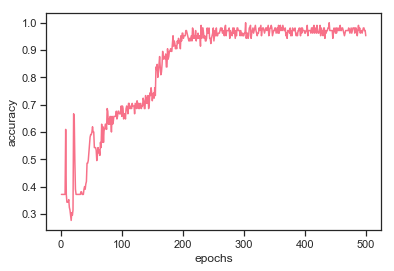

 12%|█▎        | 16/128 [00:36<04:13,  2.26s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603

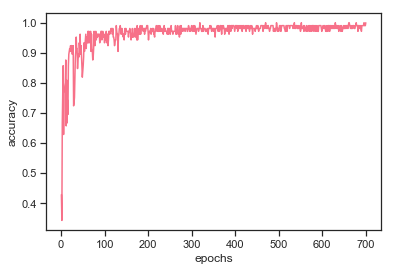

 13%|█▎        | 17/128 [00:38<04:23,  2.37s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30

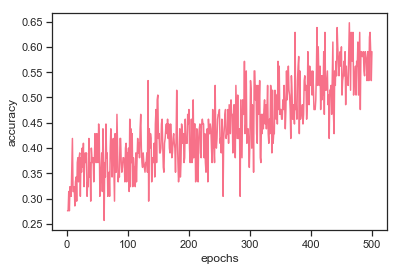

 14%|█▍        | 18/128 [00:40<04:09,  2.27s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303  

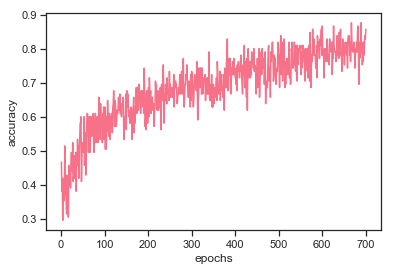

 15%|█▍        | 19/128 [00:43<04:14,  2.34s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

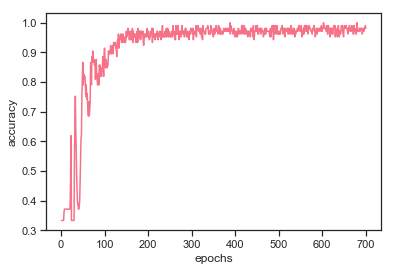

 16%|█▌        | 20/128 [00:45<04:15,  2.37s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

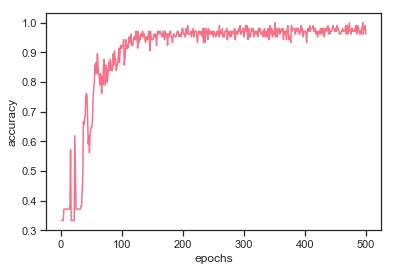

 16%|█▋        | 21/128 [00:47<03:58,  2.23s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603

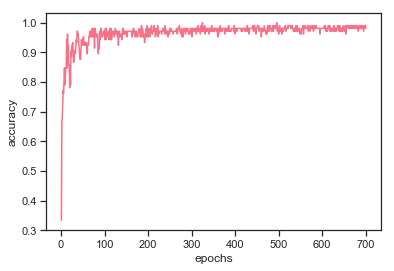

 17%|█▋        | 22/128 [00:50<04:12,  2.38s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303

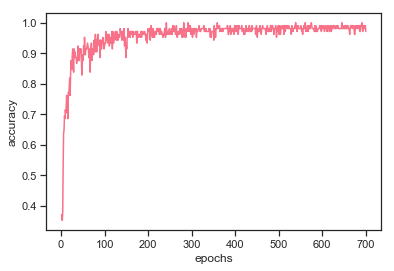

 18%|█▊        | 23/128 [00:53<04:20,  2.48s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

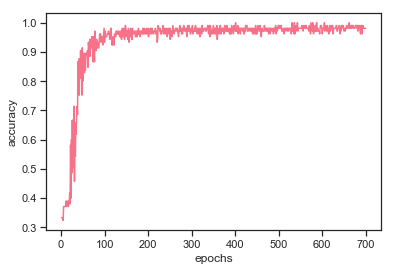

 19%|█▉        | 24/128 [00:55<04:22,  2.52s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 60

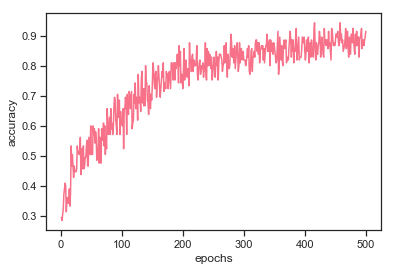

 20%|█▉        | 25/128 [00:57<04:03,  2.37s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

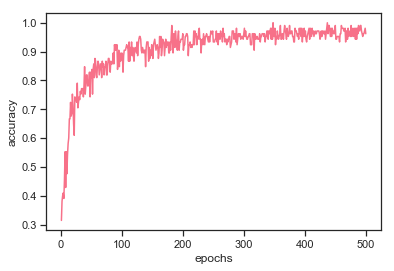

 20%|██        | 26/128 [00:59<03:51,  2.27s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

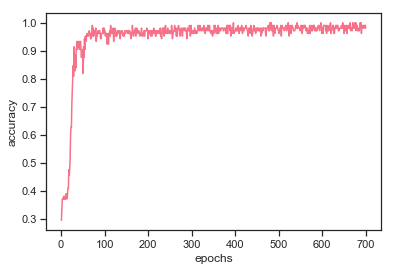

 21%|██        | 27/128 [01:02<04:02,  2.40s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

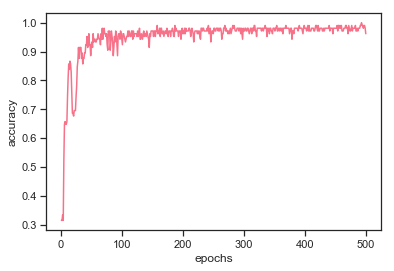

 22%|██▏       | 28/128 [01:04<03:45,  2.25s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

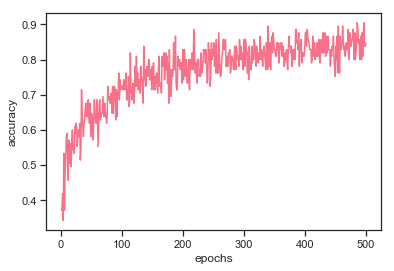

 23%|██▎       | 29/128 [01:06<03:38,  2.21s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

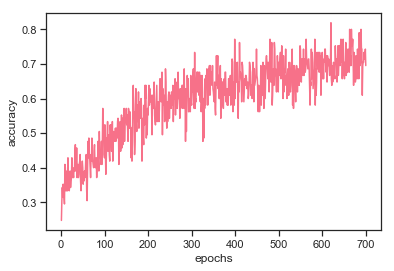

 23%|██▎       | 30/128 [01:09<03:49,  2.34s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

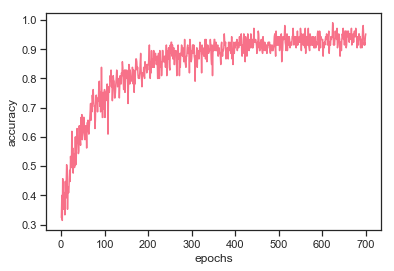

 24%|██▍       | 31/128 [01:11<03:57,  2.45s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

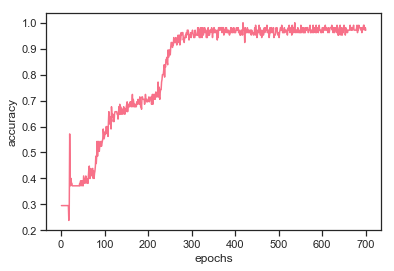

 25%|██▌       | 32/128 [01:14<03:55,  2.45s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30

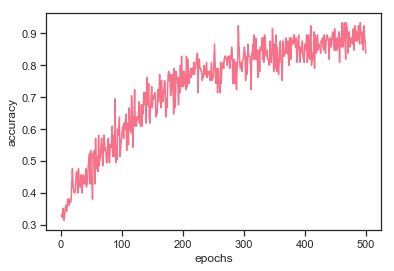

 26%|██▌       | 33/128 [01:16<03:40,  2.32s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

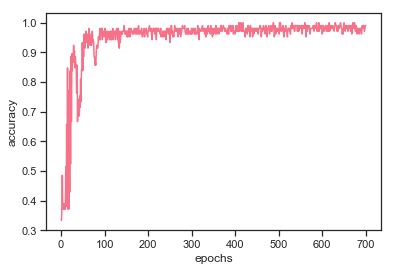

 27%|██▋       | 34/128 [01:18<03:46,  2.41s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603  

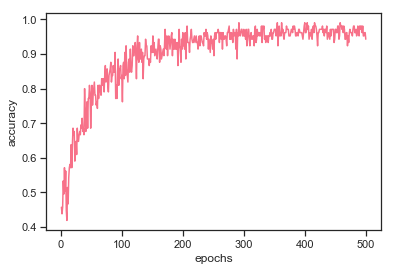

 27%|██▋       | 35/128 [01:20<03:32,  2.29s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

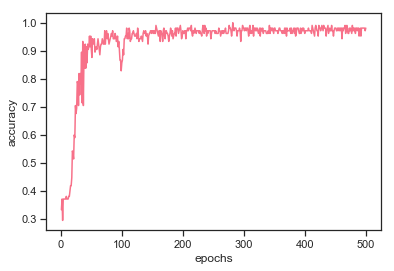

 28%|██▊       | 36/128 [01:23<03:23,  2.21s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

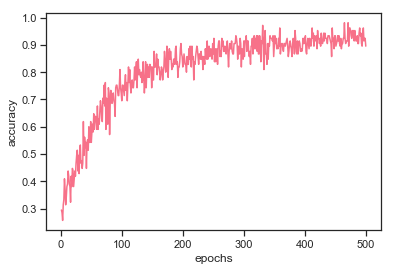

 29%|██▉       | 37/128 [01:25<03:18,  2.19s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

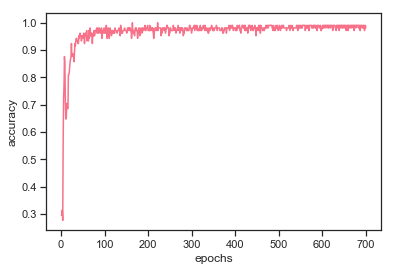

 30%|██▉       | 38/128 [01:27<03:23,  2.27s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303

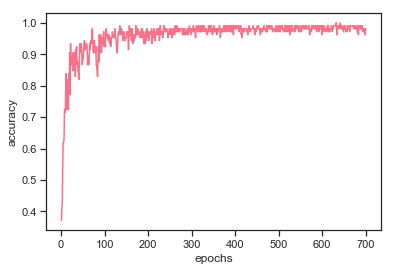

 30%|███       | 39/128 [01:30<03:33,  2.40s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

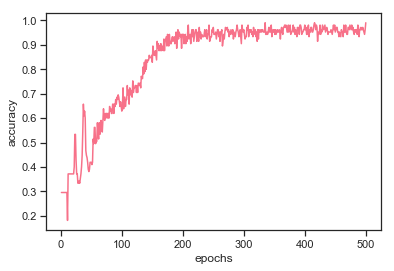

 31%|███▏      | 40/128 [01:32<03:18,  2.26s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

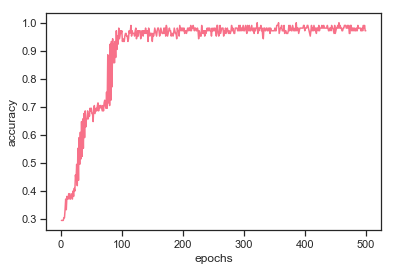

 32%|███▏      | 41/128 [01:34<03:13,  2.22s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30

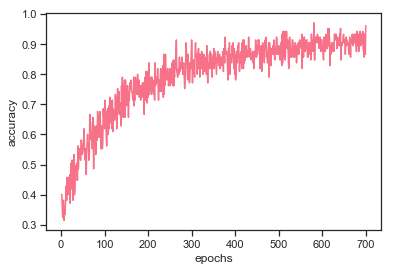

 33%|███▎      | 42/128 [01:36<03:16,  2.28s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

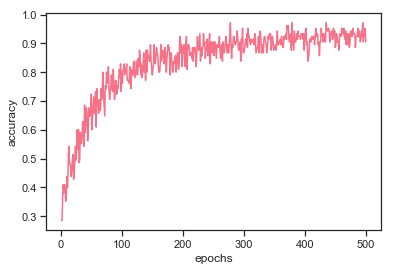

 34%|███▎      | 43/128 [01:38<03:10,  2.24s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

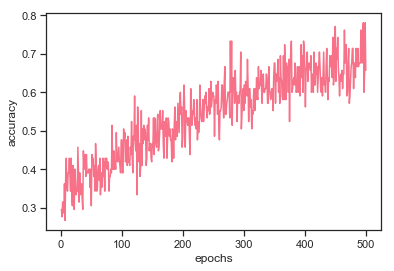

 34%|███▍      | 44/128 [01:40<03:03,  2.18s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

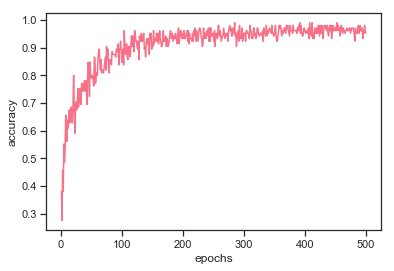

 35%|███▌      | 45/128 [01:43<02:59,  2.17s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

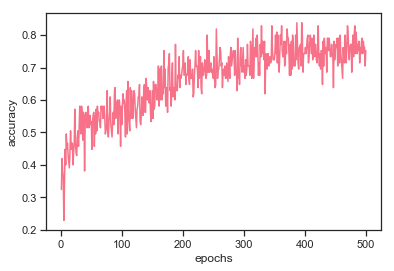

 36%|███▌      | 46/128 [01:45<02:54,  2.12s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

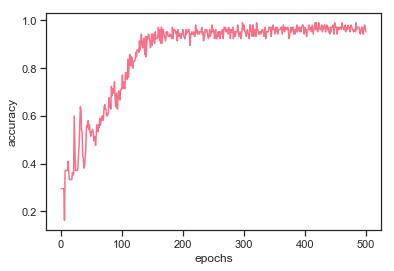

 37%|███▋      | 47/128 [01:47<02:48,  2.08s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303

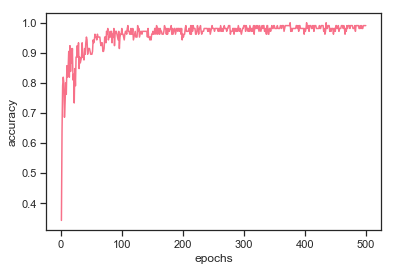

 38%|███▊      | 48/128 [01:49<02:45,  2.07s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603

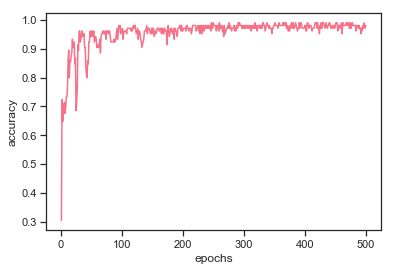

 38%|███▊      | 49/128 [01:51<02:45,  2.09s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603

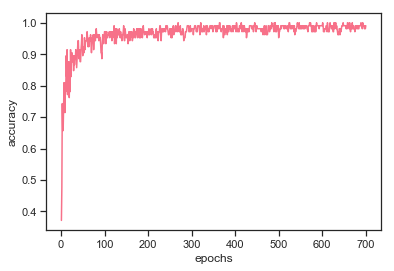

 39%|███▉      | 50/128 [01:53<02:55,  2.25s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 60

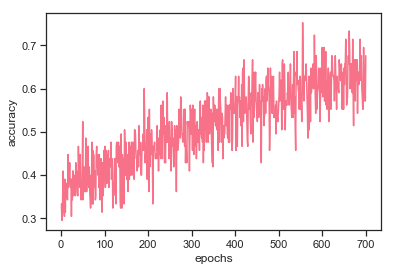

 40%|███▉      | 51/128 [01:56<03:00,  2.34s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

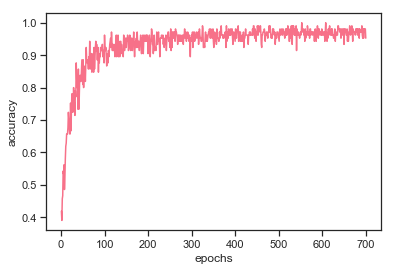

 41%|████      | 52/128 [01:59<03:04,  2.43s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

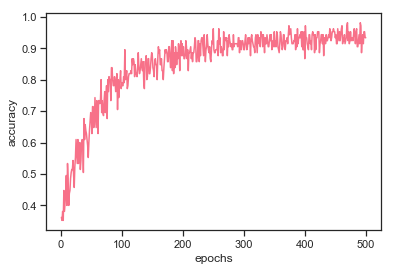

 41%|████▏     | 53/128 [02:01<02:55,  2.34s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

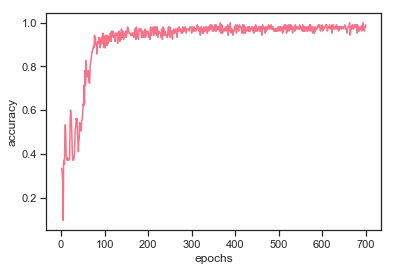

 42%|████▏     | 54/128 [02:03<02:54,  2.36s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

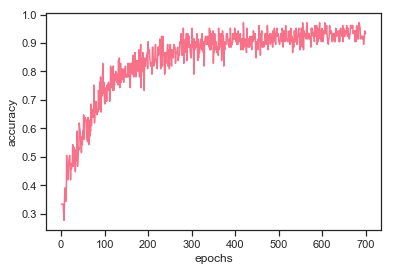

 43%|████▎     | 55/128 [02:06<03:00,  2.47s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

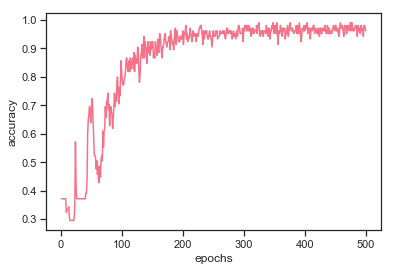

 44%|████▍     | 56/128 [02:08<02:45,  2.30s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

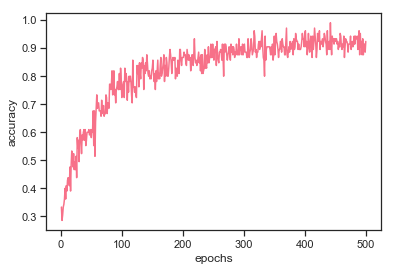

 45%|████▍     | 57/128 [02:10<02:39,  2.25s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303  

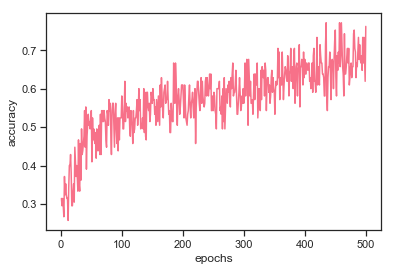

 45%|████▌     | 58/128 [02:12<02:29,  2.14s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

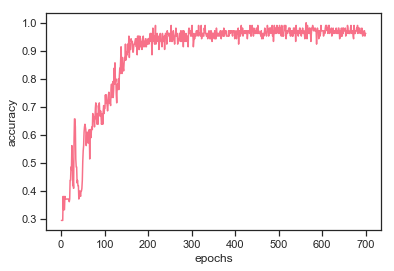

 46%|████▌     | 59/128 [02:14<02:35,  2.26s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

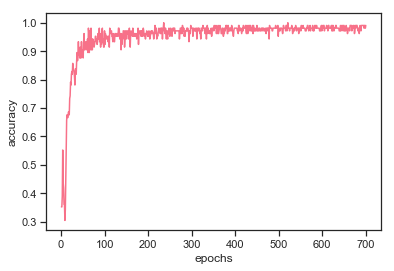

 47%|████▋     | 60/128 [02:17<02:37,  2.32s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

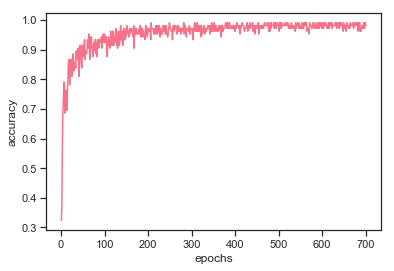

 48%|████▊     | 61/128 [02:19<02:37,  2.36s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

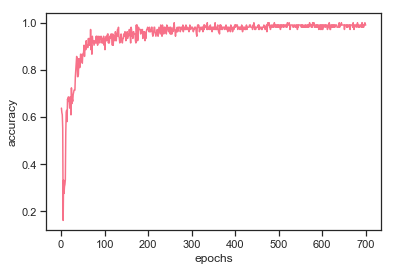

 48%|████▊     | 62/128 [02:22<02:39,  2.41s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

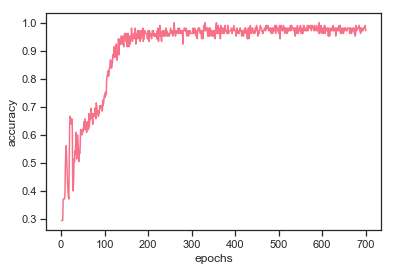

 49%|████▉     | 63/128 [02:24<02:38,  2.44s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

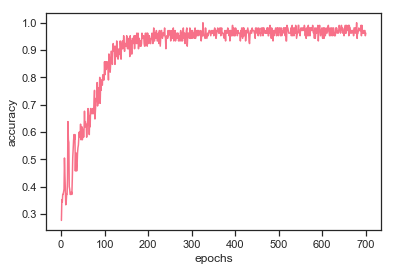

 50%|█████     | 64/128 [02:27<02:36,  2.44s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303

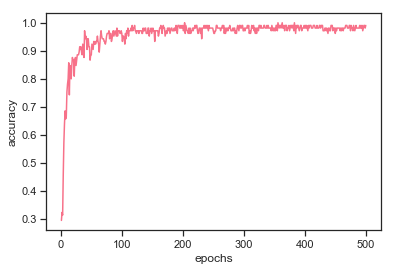

 51%|█████     | 65/128 [02:29<02:26,  2.32s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 60

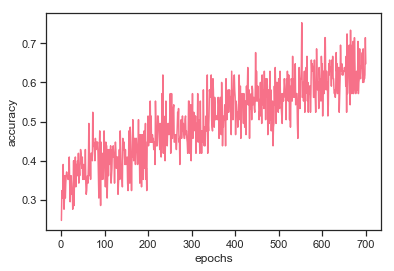

 52%|█████▏    | 66/128 [02:31<02:28,  2.39s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603

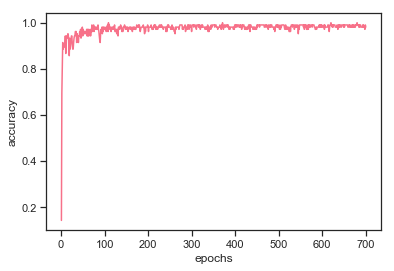

 52%|█████▏    | 67/128 [02:34<02:31,  2.48s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

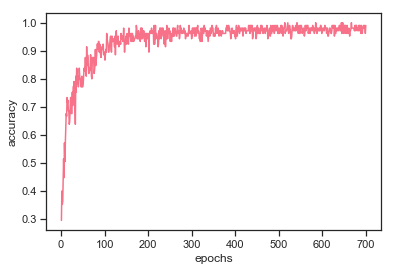

 53%|█████▎    | 68/128 [02:37<02:31,  2.53s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603  

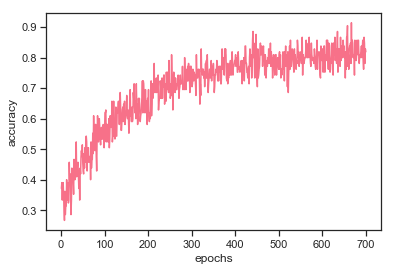

 54%|█████▍    | 69/128 [02:39<02:28,  2.53s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303

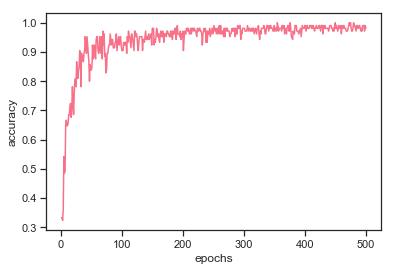

 55%|█████▍    | 70/128 [02:41<02:18,  2.38s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

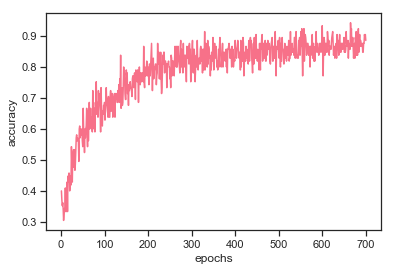

 55%|█████▌    | 71/128 [02:44<02:21,  2.49s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

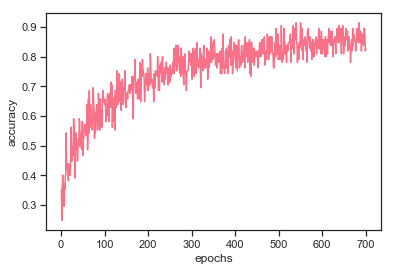

 56%|█████▋    | 72/128 [02:47<02:21,  2.53s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303  

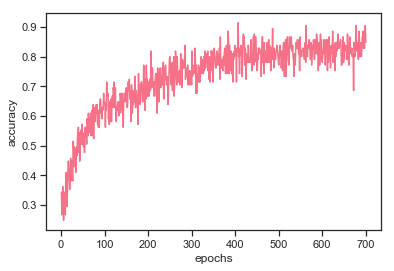

 57%|█████▋    | 73/128 [02:49<02:19,  2.53s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

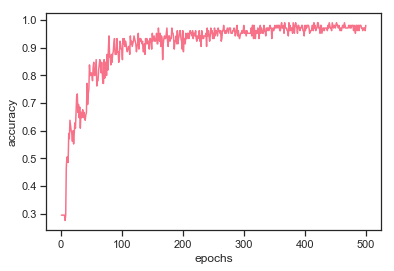

 58%|█████▊    | 74/128 [02:51<02:06,  2.35s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303  

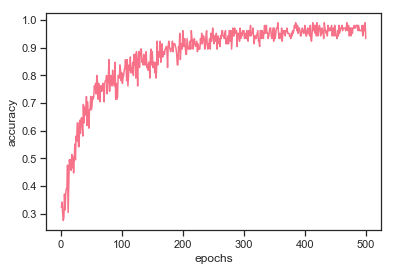

 59%|█████▊    | 75/128 [02:53<01:57,  2.22s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

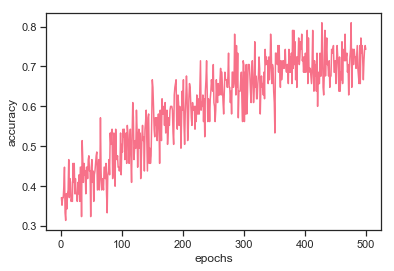

 59%|█████▉    | 76/128 [02:55<01:54,  2.19s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 60

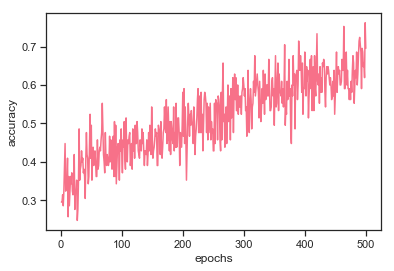

 60%|██████    | 77/128 [02:57<01:48,  2.13s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

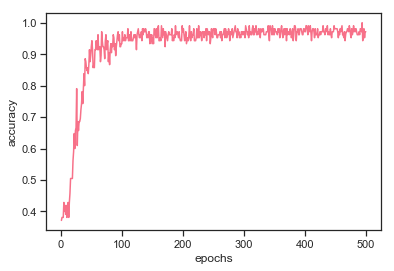

 61%|██████    | 78/128 [02:59<01:45,  2.10s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30

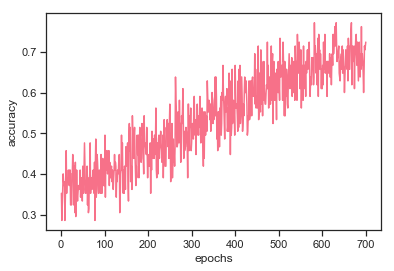

 62%|██████▏   | 79/128 [03:02<01:49,  2.23s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

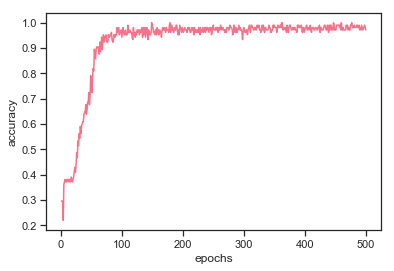

 62%|██████▎   | 80/128 [03:04<01:44,  2.18s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

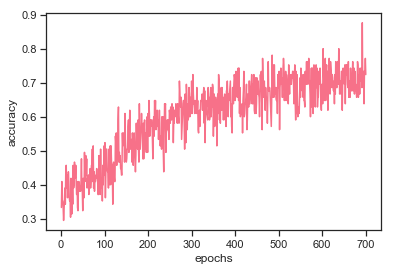

 63%|██████▎   | 81/128 [03:06<01:49,  2.34s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

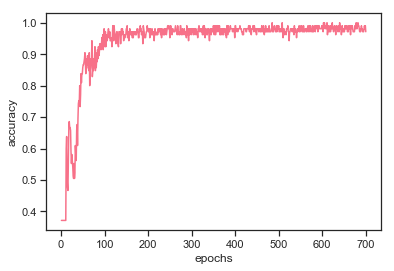

 64%|██████▍   | 82/128 [03:09<01:51,  2.42s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

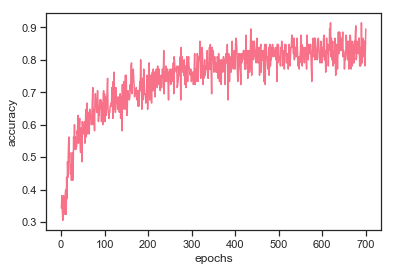

 65%|██████▍   | 83/128 [03:12<01:53,  2.51s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

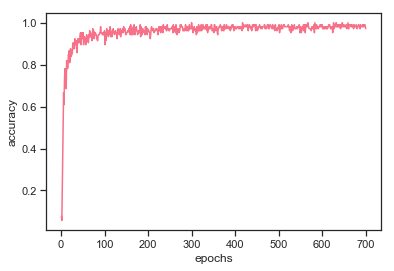

 66%|██████▌   | 84/128 [03:14<01:49,  2.49s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303

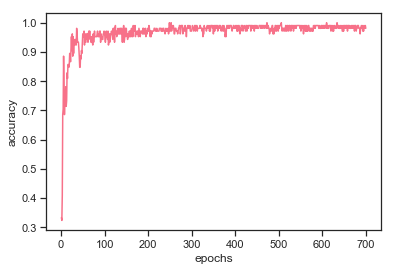

 66%|██████▋   | 85/128 [03:17<01:50,  2.56s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

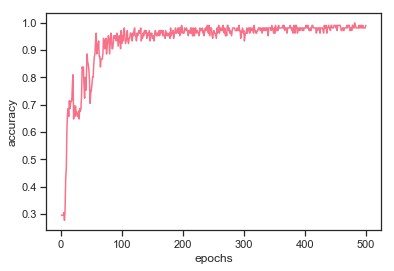

 67%|██████▋   | 86/128 [03:19<01:39,  2.36s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603  

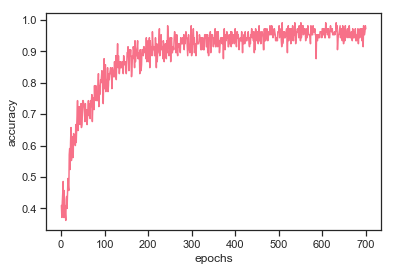

 68%|██████▊   | 87/128 [03:21<01:38,  2.41s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

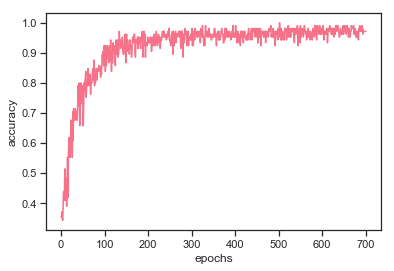

 69%|██████▉   | 88/128 [03:24<01:39,  2.48s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

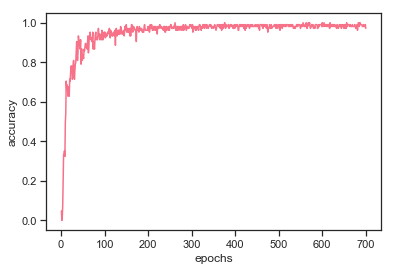

 70%|██████▉   | 89/128 [03:26<01:37,  2.49s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

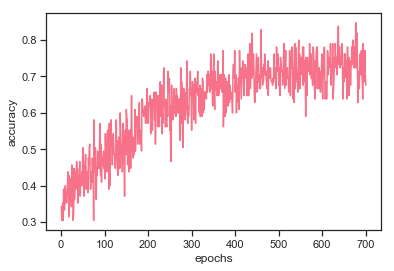

 70%|███████   | 90/128 [03:29<01:36,  2.53s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 60

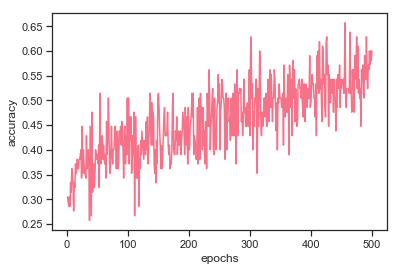

 71%|███████   | 91/128 [03:31<01:27,  2.37s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 60

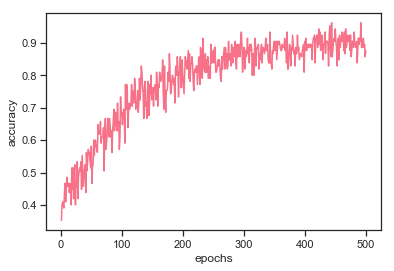

 72%|███████▏  | 92/128 [03:33<01:20,  2.24s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30

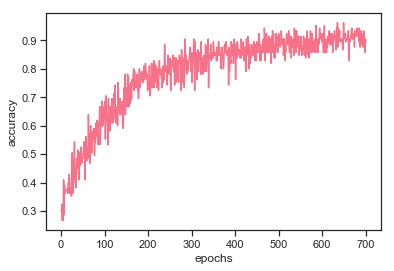

 73%|███████▎  | 93/128 [03:35<01:20,  2.30s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

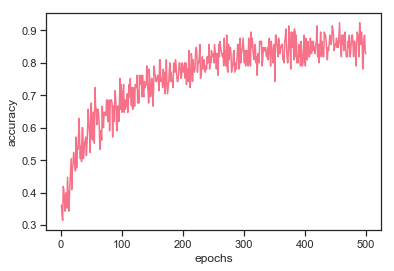

 73%|███████▎  | 94/128 [03:38<01:16,  2.25s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

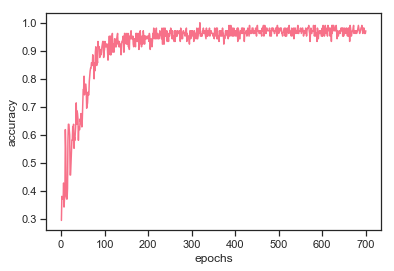

 74%|███████▍  | 95/128 [03:40<01:16,  2.33s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

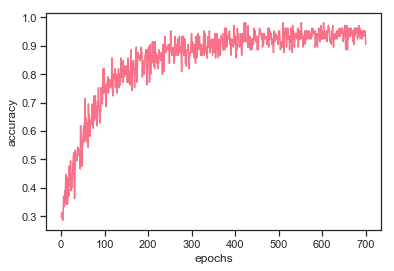

 75%|███████▌  | 96/128 [03:43<01:17,  2.41s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

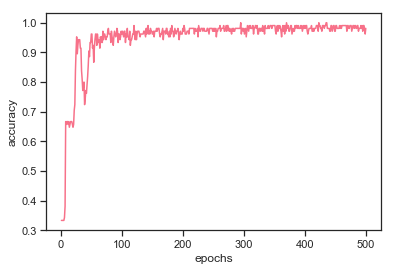

 76%|███████▌  | 97/128 [03:45<01:10,  2.29s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

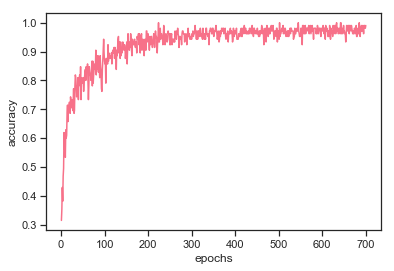

 77%|███████▋  | 98/128 [03:47<01:11,  2.38s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

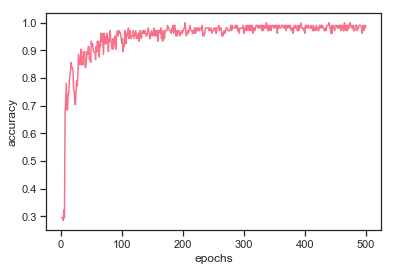

 77%|███████▋  | 99/128 [03:49<01:05,  2.27s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.9, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

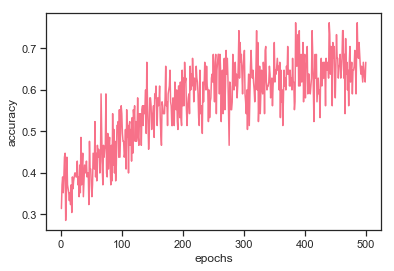

 78%|███████▊  | 100/128 [03:51<01:01,  2.20s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

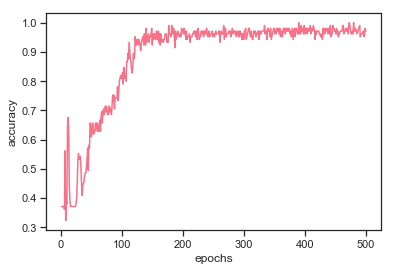

 79%|███████▉  | 101/128 [03:53<00:57,  2.14s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603  

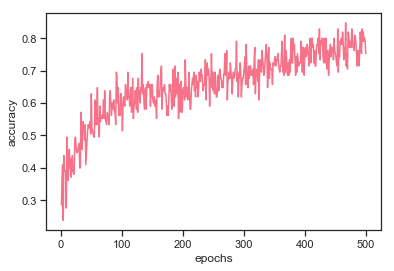

 80%|███████▉  | 102/128 [03:55<00:53,  2.07s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603  

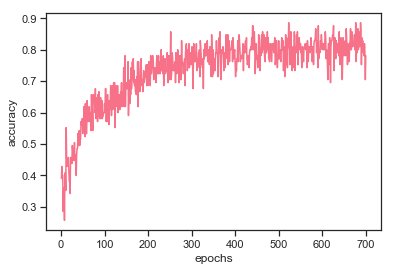

 80%|████████  | 103/128 [03:58<00:54,  2.18s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

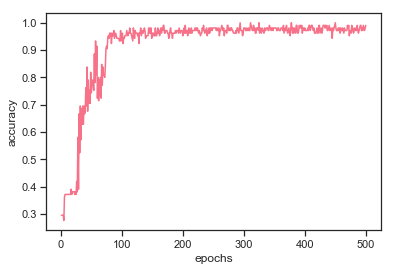

 81%|████████▏ | 104/128 [04:00<00:52,  2.17s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 60

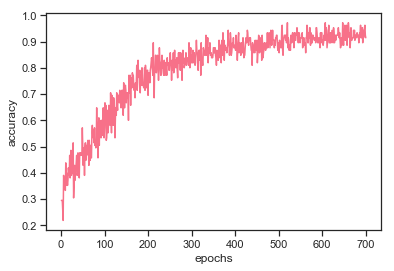

 82%|████████▏ | 105/128 [04:02<00:52,  2.28s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

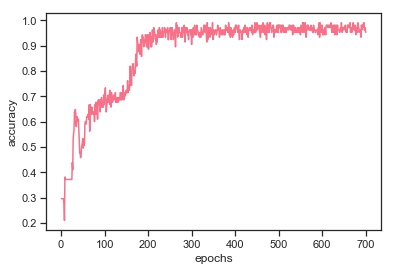

 83%|████████▎ | 106/128 [04:05<00:51,  2.33s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

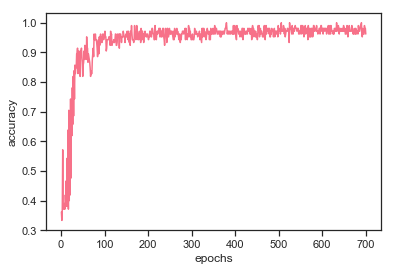

 84%|████████▎ | 107/128 [04:07<00:50,  2.42s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

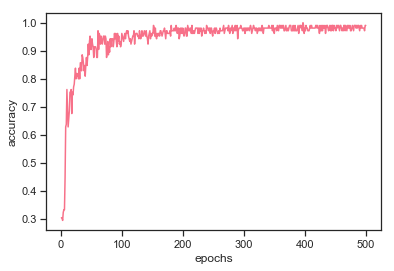

 84%|████████▍ | 108/128 [04:09<00:46,  2.30s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

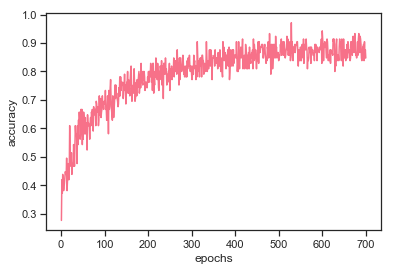

 85%|████████▌ | 109/128 [04:12<00:46,  2.42s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603 

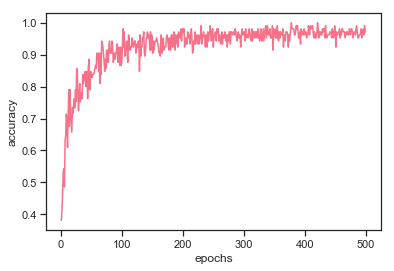

 86%|████████▌ | 110/128 [04:14<00:41,  2.31s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603

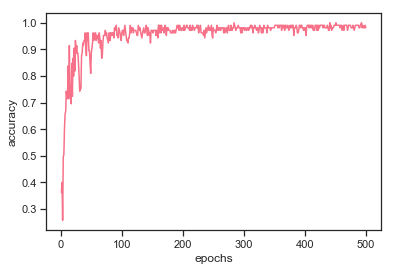

 87%|████████▋ | 111/128 [04:16<00:38,  2.26s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303  

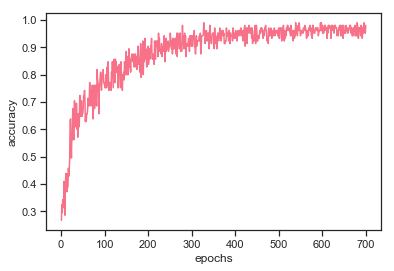

 88%|████████▊ | 112/128 [04:19<00:37,  2.32s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

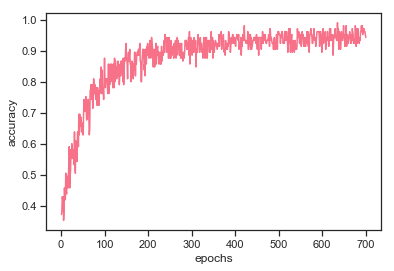

 88%|████████▊ | 113/128 [04:22<00:36,  2.44s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603  

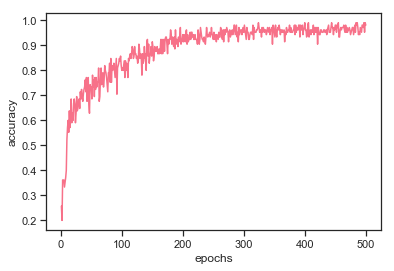

 89%|████████▉ | 114/128 [04:23<00:31,  2.27s/it]

{'batch_size': 128, 'epochs': 700, 'dropout': 0.5, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 60

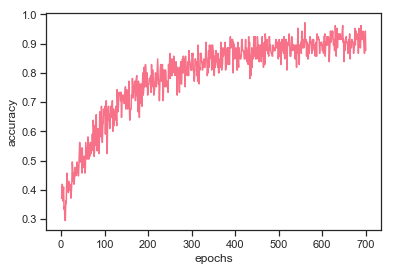

 90%|████████▉ | 115/128 [04:26<00:30,  2.35s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

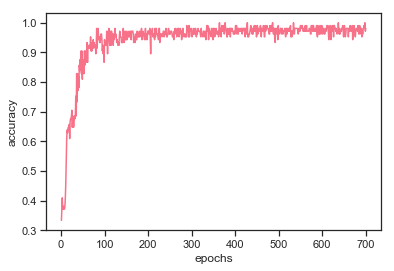

 91%|█████████ | 116/128 [04:29<00:29,  2.43s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303  

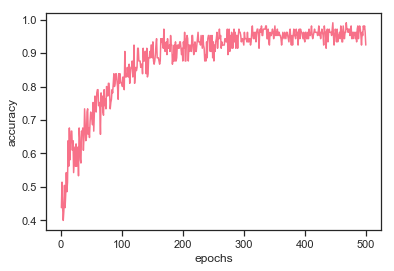

 91%|█████████▏| 117/128 [04:31<00:25,  2.30s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

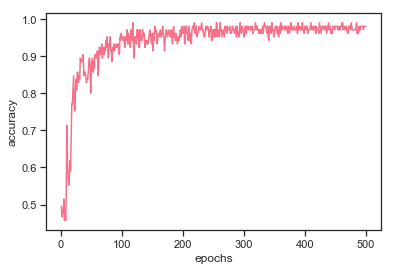

 92%|█████████▏| 118/128 [04:33<00:21,  2.18s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

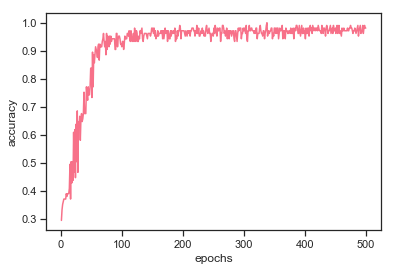

 93%|█████████▎| 119/128 [04:35<00:19,  2.14s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.02, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6

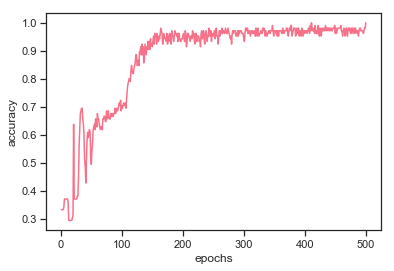

 94%|█████████▍| 120/128 [04:37<00:16,  2.10s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

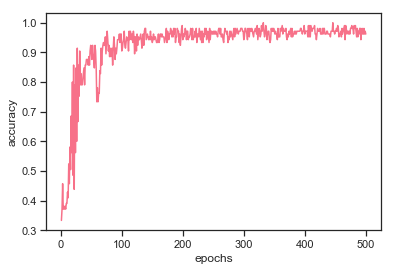

 95%|█████████▍| 121/128 [04:39<00:14,  2.11s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.5, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

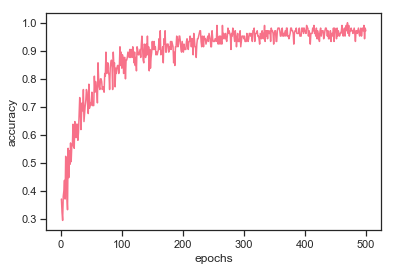

 95%|█████████▌| 122/128 [04:41<00:12,  2.09s/it]

{'batch_size': 256, 'epochs': 700, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

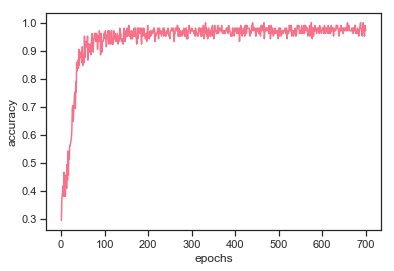

 96%|█████████▌| 123/128 [04:43<00:11,  2.27s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.05, 'activation': 'relu', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603

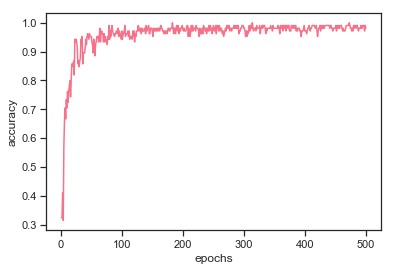

 97%|█████████▋| 124/128 [04:45<00:08,  2.21s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.05, 'activation': 'sigmoid', 'dense_1': 200, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 

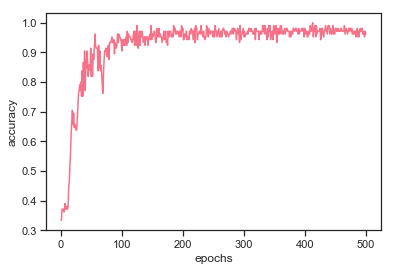

 98%|█████████▊| 125/128 [04:48<00:06,  2.18s/it]

{'batch_size': 128, 'epochs': 500, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'adam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303  

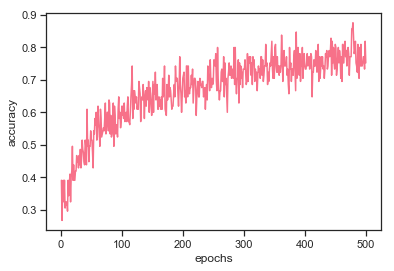

 98%|█████████▊| 126/128 [04:50<00:04,  2.10s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.02, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303

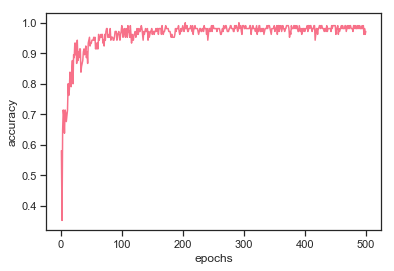

 99%|█████████▉| 127/128 [04:52<00:02,  2.11s/it]

{'batch_size': 256, 'epochs': 500, 'dropout': 0.9, 'activation': 'relu', 'dense_1': 100, 'optimizer': 'nadam', 'losses': 'categorical_crossentropy'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303 

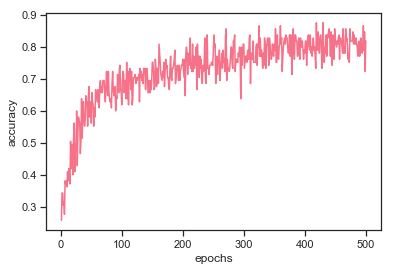

100%|██████████| 128/128 [04:54<00:00,  2.09s/it]


In [10]:
parameters = {
    'batch_size': [128, 256],
    'epochs'    : [500, 700],
    'dropout'   : [0.05, 0.02, 0.5, 0.9],
    'activation': ['relu', 'sigmoid'],
    'dense_1'   : [100, 200],
    'optimizer' : ['adam', 'nadam'],
    'losses'    : ['categorical_crossentropy'],
}

def hmodel_convolutional(
    x_train,
    y_train,
    x_test,
    y_test,
    parameters = parameters
    ):
    print(parameters)
    model = Sequential()
    model.add(Conv1D(32, (3), input_shape = (4, 1), activation  = parameters['activation']))
    model.add(MaxPooling1D(pool_size = (2)))
    model.add(Flatten())
    model.add(Dropout(rate = parameters['dropout']))
    model.add(Dense(parameters['dense_1'],          activation  = parameters['activation']))
    model.add(Dense(y_train.shape[1],               activation  = 'softmax'))
    model.compile(
        loss      = parameters['losses'],
        optimizer = parameters['optimizer'],
        metrics   = ['accuracy']
    )
    print(model.summary())
    out = model.fit(
        x_train,
        y_train,
        batch_size      = parameters['batch_size'],
        epochs          = parameters['epochs'],
        verbose         = False,
        validation_data = [x_test, y_test],
        callbacks       = [history]
    )
    score = model.evaluate(x_test, y_test, verbose = False)
    print('test loss:', score[0])
    print('test accuracy:', score[1])
    plt.plot(range(1, parameters['epochs'] + 1), history.acc)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()
    return out, model

h = ta.Scan(
    x               = x,
    y               = y,
    params          = parameters,
    dataset_name    = 'iris',
    experiment_no   = '1',
    model           = hmodel_convolutional,
    grid_downsample = 1
)

# reporting on scan

In [23]:
r = ta.Reporting(h)
r.data.sort_values(by = ['acc'], ascending = False).head()

,round_epochs,val_loss,val_acc,loss,acc,batch_size,epochs,dropout,activation,dense_1,optimizer,losses
64,500,0.053327,1.0,0.028543,1.0,256,500,0.05,relu,100,nadam,categorical_crossentropy
69,500,0.059534,1.0,0.026460,1.0,128,500,0.05,relu,100,nadam,categorical_crossentropy
66,700,0.047633,1.0,0.020067,1.0,128,700,0.02,relu,200,nadam,categorical_crossentropy
115,700,0.054551,1.0,0.027527,1.0,256,700,0.05,sigmoid,200,nadam,categorical_crossentropy
1,700,0.057601,1.0,0.020031,1.0,256,700,0.02,relu,200,adam,categorical_crossentropy


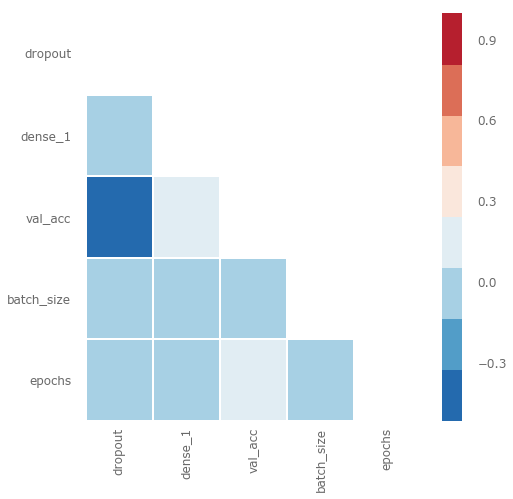

In [12]:
r.plot_corr()

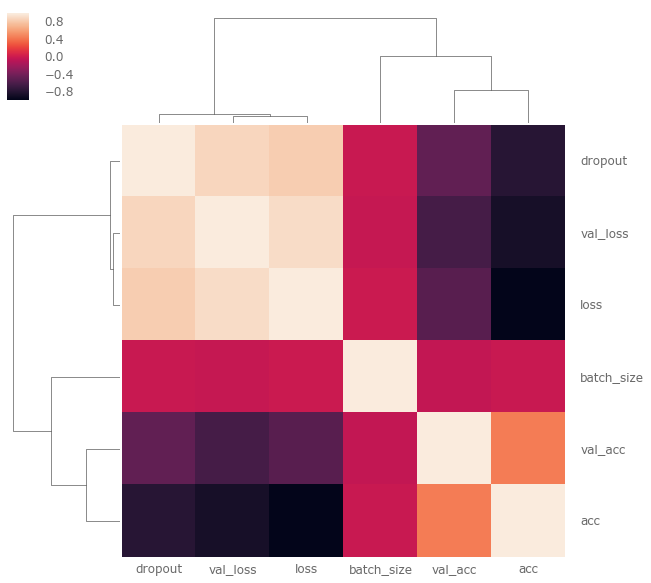

In [13]:
df = r.data[['val_loss', 'val_acc', 'loss', 'acc', 'batch_size', 'dropout']]
plot = sns.clustermap(df.corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)